Enter Shoulder Length (cm) : 30
2.3563416622423436


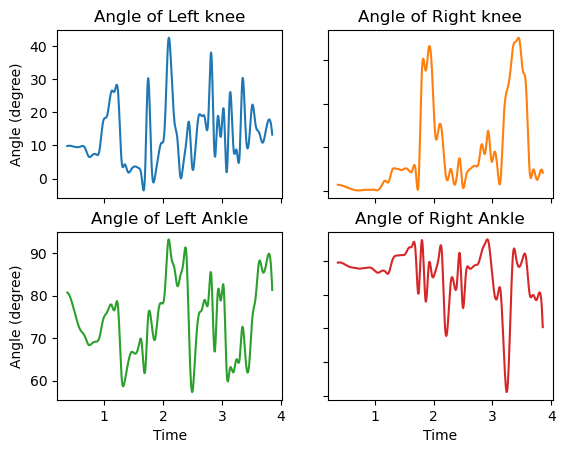

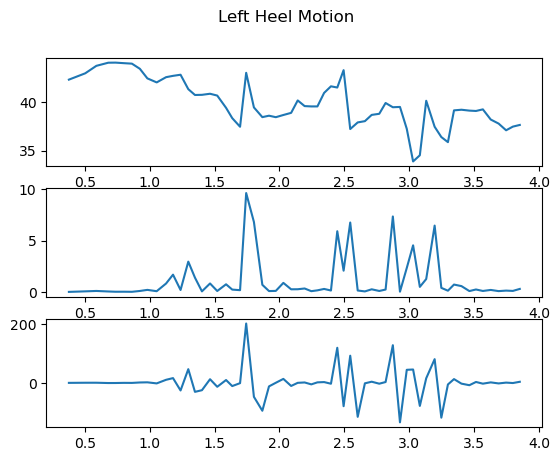

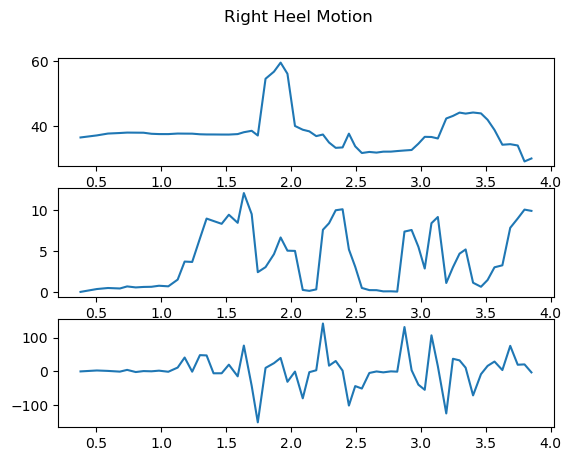

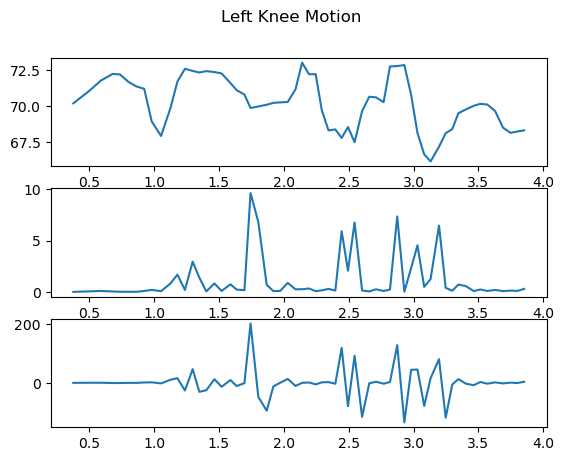

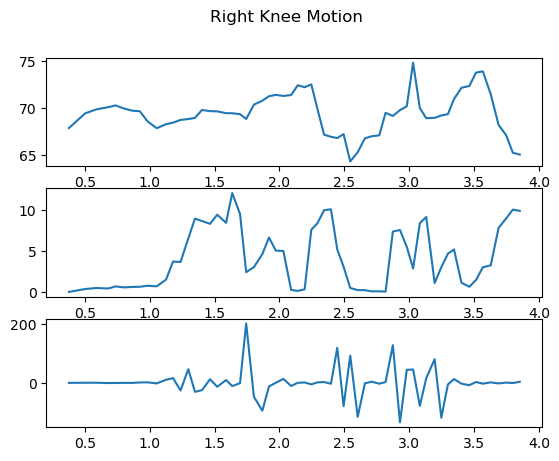

In [2]:
#Calibration Factor
import pandas as pd
import cv2
import mediapipe as mp
import numpy as np
import csv
import math
import timeit
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
cap = cv2.VideoCapture(0)
act = float(input("Enter Shoulder Length (cm) : "))
n = 0
cf = 0
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        #Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        h, w, c = image.shape
        
        #Make detection
        results = pose.process(image)
        
        #Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        
        #Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
           
            
            #Get coordinates
            ls = [(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)*w,(1-(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)) *h]
            rs = [(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x)*w, (1-(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y))*h]
            xls =  (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)*w
            yls =  (1-(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y))*h
            xrs =  (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x)*w
            yrs =  (1-(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y))*h
            #Position
            pls = [(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x), (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)]
            prs = [(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x), (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)]

            #Sum CF
            n=n+1
            
            
            #Length
            len = math.sqrt(pow((xls - xrs),2) + pow((yls - yrs),2))
            
            #calibration
            cf = (len/act)+ cf
            
        
        
           
             #Visualize Coordinates
            cv2.putText(image,str(ls),
                           tuple(np.multiply(pls,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(rs),
                           tuple(np.multiply(prs,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2,cv2.LINE_AA 
                                ) 
                             
            
            #print(cf)
                      
                
                       
            
            
        except:
            pass
       
        
        #Render detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))
        
        
        cv2.imshow('Mediapipe Feed',image)
    
        if cv2.waitKey(10) & n==100:
            break
    
    avgcf = cf / n
    print(avgcf)
    cap.release()
    cv2.destroyAllWindows()


    
#Main Body
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
cap = cv2.VideoCapture(0)

#calculate angle function
def calculate_angle(a,b,c):
    a=np.array(a) #First
    b=np.array(b) #Mid
    c=np.array(c) #End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0])-np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return 180-angle

#function of smoothing data

def smooth_data(x, y, num_points, degree):
    X_Y_Spline = make_interp_spline(x, y)
 
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), num_points)
    Y_ = X_Y_Spline(X_)
    return X_,Y_



#new csv file
landmarks= ['Time (s) ']
landmarks+= ['left hip - X (cm)']
landmarks+= ['left hip - Y (cm)']
landmarks+= ['right hip - X (cm)']
landmarks+= ['right hip - Y (cm)']
landmarks+= ['left ankle - X (cm)']
landmarks+= ['left ankle - Y (cm)']
landmarks+= ['right ankle - X (cm)']
landmarks+= ['right ankle - Y (cm)']
landmarks+= ['left_heel - X (cm)']
landmarks+= ['left_heel - Y (cm)']
landmarks+= ['right_heel - X (cm)']
landmarks+= ['right_heel - Y (cm)']
landmarks+= ['left_toe - X (cm)']
landmarks+= ['left_toe - Y (cm)']
landmarks+= ['right_toe - X (cm)']
landmarks+= ['right_toe - Y (cm)']
landmarks+= ['left knee - X (cm)']
landmarks+= ['left knee - Y (cm)']
landmarks+= ['right knee - X (cm)']
landmarks+= ['right knee - Y (cm)']
landmarks+= ['left knee angle (degree)']
landmarks+= ['right knee angle (degree)']
landmarks+= ['left ankle angle (degree)']
landmarks+= ['right ankle angle (degree)']
landmarks+= ['Velocity Left Heel (m/s)']
landmarks+= ['Velocity Right Heel (m/s)']
landmarks+= ['Velocity Left Knee (m/s)']
landmarks+= ['Velocity Right knee (m/s)']
landmarks+= ['Acceleration Left Heel (m/s^2)']
landmarks+= ['Acceleration Right Heel(m/s^2)']
landmarks+= ['Acceleration Left Knee(m/s^2)']
landmarks+= ['Acceleration Right Knee(m/s^2)']

#initialization
time_in = 0
time = 0

xlh_in = 0
ylh_in = 0

xrh_in = 0
yrh_in = 0

xlk_in = 0
ylk_in = 0

xrk_in = 0
yrk_in = 0

vel_lh_in=0
vel_rh_in=0

vel_lk_in=0
vel_rk_in=0

cal = timeit.default_timer()

with open ('data.csv',mode='w',newline='') as f:
    csv_writer= csv.writer(f, delimiter=',', quotechar='"',quoting =csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)
    
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        #Recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        #Make detection
        results = pose.process(image)
        
        #Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        
        #Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            #Real coordinates
            left_hip =    [(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y))*h/avgcf]
            left_knee =   [(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y))*h/avgcf]
            left_ankle =  [(landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y))*h/avgcf]
            right_hip =   [(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y))*h/avgcf]
            right_knee =  [(landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y))*h/avgcf]
            right_ankle = [(landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y))*h/avgcf]
            left_foot =   [(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y))*h/avgcf]
            right_foot =  [(landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y))*h/avgcf]
            left_heel =   [(landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y))*h/avgcf]
            right_heel =  [(landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y))*h/avgcf]
            time_in = time
            time = timeit.default_timer()
        
            
            
            
            #Position
            pleft_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            pleft_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            pleft_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            pright_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            pright_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            pright_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            pleft_foot = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]
            pright_foot = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]
            pleft_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
            pright_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
            
            
            #Calculate angle
            angle_ltknee= calculate_angle(left_hip,left_knee,left_ankle)
            angle_rtknee= calculate_angle(right_hip,right_knee,right_ankle)
            angle_ltankle= calculate_angle(left_knee,left_ankle,left_foot)
            angle_rtankle= calculate_angle(right_knee,right_ankle,right_foot)
            
            #Position for Velocity
            
            xlh    =  (landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x)*w/avgcf
            
            ylh    =  (1-(landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y))*h/avgcf
            
            xrh    =  (landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x)*w/avgcf
            
            yrh    =  (1-(landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y))*h/avgcf

            xlk    =  (landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x)*w/avgcf
            
            ylk    =  (1-(landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y))*h/avgcf
            
            xrk    =  (landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x)*w/avgcf
            
            yrk    =  (1-(landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y))*h/avgcf

            
            #Length
            dist_lh = math.sqrt(pow((xlh - xlh_in),2) + pow((ylh - ylh_in),2))
            dist_rh = math.sqrt(pow((xlh - xrh_in),2) + pow((yrh - yrh_in),2))
            
            dist_lk = math.sqrt(pow((xlk - xlk_in),2) + pow((ylk - ylk_in),2))
            dist_rk = math.sqrt(pow((xlk - xrk_in),2) + pow((yrk - yrk_in),2))
            
            #Velocity for list:
            
            vel_lh = dist_lh/((time-time_in)*100)
            vel_rh = dist_rh/((time-time_in)*100)
            
            vel_lk = dist_lk/((time-time_in)*100)
            vel_rk = dist_rk/((time-time_in)*100)
            
            #Acceleration for list:
            
            acc_lh = (vel_lh-vel_lh_in)/((time-time_in))
            acc_rh = (vel_rh-vel_rh_in)/((time-time_in))
            
            acc_lk = (vel_lk-vel_lk_in)/((time-time_in))
            acc_rk = (vel_rk-vel_rk_in)/((time-time_in))
            
            #coordinate list
            coordinates =list(np.array([time-cal,(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y))*h/avgcf,
                                     (landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x)*w/avgcf,(1-(landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y))*h/avgcf,
                                       angle_ltknee,
                                       angle_rtknee,
                                       angle_ltankle,
                                       angle_rtankle,
                                       vel_lh,
                                       vel_rh,
                                       vel_lk,
                                       vel_rk, 
                                       acc_lh,
                                       acc_rh,
                                       acc_lk,
                                       acc_rk]).flatten())
            
           
            #Velocity post initialization
            xlh_in =  xlh
            ylh_in =  ylh
            
            xrh_in =  xrh
            yrh_in =  yrh
            
            xlk_in =  xlk
            ylk_in =  ylk
            
            xrk_in =  xrk
            yrk_in =  yrk
            
            vel_lh_in=vel_lh
            vel_rh_in=vel_rh
            
            vel_lk_in=vel_lk
            vel_rk_in=vel_rk
            
            #Visualize angle
            cv2.putText(image,str(angle_ltknee),
                           tuple(np.multiply(pleft_knee,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(angle_rtknee),
                           tuple(np.multiply(pright_knee,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(angle_ltankle),
                           tuple(np.multiply(pleft_ankle,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,102),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(angle_rtankle),
                           tuple(np.multiply(pright_ankle,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(51,255,255),2,cv2.LINE_AA 
                                ) 
             #Visualize Coordinates
            cv2.putText(image,str(left_knee),
                           tuple(np.multiply(pleft_knee,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,127),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(right_knee),
                           tuple(np.multiply(pright_knee,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,51),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(left_ankle),
                           tuple(np.multiply(pleft_ankle,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,102),2,cv2.LINE_AA 
                                ) 
            cv2.putText(image,str(right_ankle),
                           tuple(np.multiply(pright_ankle,[w,h]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX,0.5,(51,0,255),2,cv2.LINE_AA 
                                ) 
            
            #Export coordinates to csv
            with open ('data.csv',mode='a',newline='') as f:
                csv_writer= csv.writer(f, delimiter=',', quotechar='"',quoting =csv.QUOTE_MINIMAL)
                csv_writer.writerow(coordinates)                   
                
                       
            
            
        except:
            pass
        
        #Render detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))
        
        
        cv2.imshow('Mediapipe Feed',image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
  
    #Array for Plotting
    df = pd.read_csv('data.csv')
    time2plot=np.array(df.iloc[:, 0])

    #Coordinate Array
    plot_xlh = np.array(df.iloc[:, 9])
    plot_ylh = np.array(df.iloc[:, 10])

    plot_xrh = np.array(df.iloc[:, 11])
    plot_yrh = np.array(df.iloc[:, 12])

    plot_xlk = np.array(df.iloc[:, 17])
    plot_ylk = np.array(df.iloc[:, 18])

    plot_xrk = np.array(df.iloc[:, 19])
    plot_yrk = np.array(df.iloc[:, 20])

    #velocity array
    velocity_lh = np.array(df.iloc[:, 25])
    velocity_rh = np.array(df.iloc[:, 26])
    velocity_lk = np.array(df.iloc[:, 27])
    velocity_rk = np.array(df.iloc[:, 28])
    
    #acceleration array
    plot_acc_lh = np.array(df.iloc[:, 29])
    plot_acc_rh = np.array(df.iloc[:, 30])
    plot_acc_lk = np.array(df.iloc[:, 31])
    plot_acc_rk = np.array(df.iloc[:, 32])
    
    #angle array
    plotangle_ltknee = np.array(df.iloc[:, 21])
    plotangle_rtknee = np.array(df.iloc[:, 22])
    plotangle_ltankle = np.array(df.iloc[:, 23])
    plotangle_rtankle = np.array(df.iloc[:, 24])

    #Smoothed Angle
    time_smooth_ltknee,ang_smooth_ltknee   = smooth_data(time2plot, plotangle_ltknee, 500, 5)
    time_smooth_rtknee,ang_smooth_rtknee   = smooth_data(time2plot, plotangle_rtknee, 500, 5)
    time_smooth_ltankle,ang_smooth_ltankle = smooth_data(time2plot, plotangle_ltankle, 500, 5)
    time_smooth_rtankle,ang_smooth_rtankle = smooth_data(time2plot, plotangle_rtankle, 500, 5)
    
    #Angle plot
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(time_smooth_ltknee,ang_smooth_ltknee)
    axs[0, 0].set_title('Angle of Left knee')
    axs[0, 1].plot(time_smooth_rtknee,ang_smooth_rtknee, 'tab:orange')
    axs[0, 1].set_title('Angle of Right knee')
    axs[1, 0].plot(time_smooth_ltankle,ang_smooth_ltankle, 'tab:green')
    axs[1, 0].set_title('Angle of Left Ankle')
    axs[1, 1].plot(time_smooth_rtankle,ang_smooth_rtankle, 'tab:red')
    axs[1, 1].set_title('Angle of Right Ankle')
    
    plt.savefig('Angles.png')

    for ax in axs.flat:
        ax.set(xlabel='Time', ylabel='Angle (degree)')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    
    
    #Left Heel Motion
    fig, axs = plt.subplots(3)
    fig.suptitle('Left Heel Motion')
    axs[0].plot(time2plot,plot_ylh)
    axs[1].plot(time2plot,velocity_lh)
    axs[2].plot(time2plot,plot_acc_lh)

    plt.savefig('Left Heel Motion.png')

    #Right Heel Motion
    fig, axs = plt.subplots(3)
    fig.suptitle('Right Heel Motion')
    axs[0].plot(time2plot,plot_yrh)
    axs[1].plot(time2plot,velocity_rh)
    axs[2].plot(time2plot,plot_acc_rh)
    
    plt.savefig('Right Heel Motion.png')

    #Left Knee Motion
    fig, axs = plt.subplots(3)
    fig.suptitle('Left Knee Motion')
    axs[0].plot(time2plot,plot_ylk)
    axs[1].plot(time2plot,velocity_lk)
    axs[2].plot(time2plot,plot_acc_lk)
    
    plt.savefig('Left Knee Motion.png')

    #Right Knee Motion
    fig, axs = plt.subplots(3)
    fig.suptitle('Right Knee Motion')
    axs[0].plot(time2plot,plot_yrk)
    axs[1].plot(time2plot,velocity_rk)
    axs[2].plot(time2plot,plot_acc_lk)
    
    plt.savefig('Right Knee Motion.png')
    
    cap.release() 
    cv2.destroyAllWindows()
